In [1]:
## Ter notebook
from matplotlib.collections import PatchCollection
from matplotlib.colors import ListedColormap
import matplotlib
import matplotlib.pyplot as plt
import random
import numpy as np

# -1 for max
MAX_GENOMES = 10000
DEPTH = -1

In [2]:
def load_data(filename):
    file = open(filename, "r")
    content = file.read()
    file.close()
    return content

In [3]:
def load_genomes(filename):
    genomes_raw = load_data(filename)
    genomes_split = genomes_raw.split("\n")
    genomes_cleaned = []
    max_genome = MAX_GENOMES
    for genome in genomes_split:
        genome_cleaned = []
        depth = DEPTH
        for char in genome.split(" "):
            if char == "0" or char == "1":
                genome_cleaned.append(int(char))
            depth -= 1
        if depth == 0: break 
        if genome_cleaned != []: genomes_cleaned.append(genome_cleaned)
        max_genome -= 1
        if max_genome == 0: break
    return genomes_cleaned

In [4]:
AGs = load_genomes("WGAN.hapt")
RGs = load_genomes("REAL.hapt")

In [5]:
def genome_curve(_genomes):
    curve_length = len(_genomes[0])
    curve = []
    for i in range(curve_length):
        curve.append(0)
    for i in range(len(_genomes)):
        for j in range(curve_length):
            if _genomes[i][j]: curve[j] += 1
    return curve

In [6]:
AG_curve = genome_curve(AGs)
RG_curve = genome_curve(RGs)

In [7]:
def draw_curve_as_boxes(curve1, curve2, box_size=2, size=500, xaxis_label="Genome Position"):
    fig = plt.figure(figsize=(8, 6), dpi=80)
    ax = fig.add_subplot(111)
    
    plt.xlim([0, len(curve1)])
    plt.ylim([-size, size])
    patches = []
    colors = []
    
    for i in range(0, len(curve1)):
        patches.append(matplotlib.patches.Rectangle((i * box_size, 0), box_size, curve1[i],))
        colors.append('blue')
        patches.append(matplotlib.patches.Rectangle((i * box_size, 0 - curve2[i]), box_size,curve2[i], color='red'))
        colors.append('red')
    
    cmap = ListedColormap(colors)
    patches_collection = PatchCollection(patches, cmap=cmap)

    patches_collection.set_array(np.arange(len(patches)))

    # Legend
    red_line = matplotlib.lines.Line2D([], [], color='red', markersize=100, label='Red line')
    blue_line = matplotlib.lines.Line2D([], [], color='blue', markersize=100, label='Blue line')
    handles = [blue_line, red_line]
    ax.legend(handles=handles, labels=["Artificial Genomes", "Real Genomes"])

    # Y ticks
    ticks =  ax.get_yticks()
    ax.set_yticklabels([int(abs(tick)) for tick in ticks])

    # X and Y labels
    plt.ylabel("Number of SNIP in 10k genomes")
    plt.xlabel(xaxis_label)
    plt.title("Sum of Snips in Genome")
    
    ax.add_collection(patches_collection)
    plt.show()

/tmp/ipykernel_3770/1310573740.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(abs(tick)) for tick in ticks])


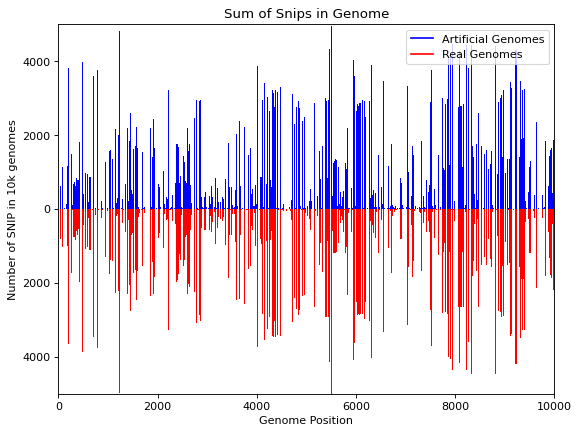

In [8]:
draw_curve_as_boxes(AG_curve, RG_curve, size=5000)

In [9]:
AG_curve_log = np.array(AG_curve)
AG_curve_log[AG_curve_log!=0] = np.log(AG_curve_log[AG_curve_log!=0])

RG_curve_log = np.array(RG_curve)
RG_curve_log[RG_curve_log!=0] = np.log(RG_curve_log[RG_curve_log!=0])

/tmp/ipykernel_3770/1310573740.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(abs(tick)) for tick in ticks])


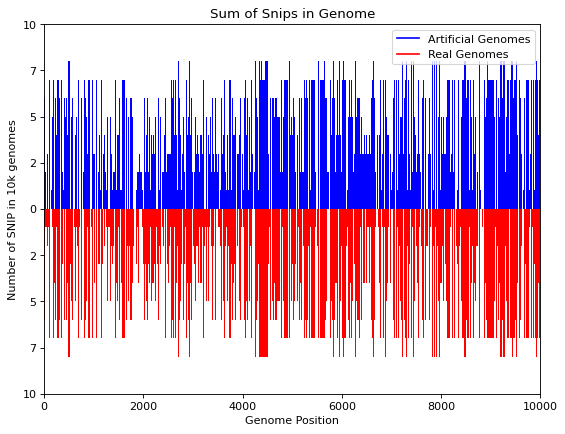

In [10]:
draw_curve_as_boxes(AG_curve_log, RG_curve_log, size=10)

In [16]:
RG_curve_sorted = np.empty(len(RG_curve))
AG_curve_sorted = np.empty(len(AG_curve))
permutation = np.argsort(RG_curve)

for i in range(len(permutation)):
    RG_curve_sorted[i] = RG_curve[permutation[i]]
    AG_curve_sorted[i] = AG_curve[permutation[i]]


/tmp/ipykernel_3770/1310573740.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(abs(tick)) for tick in ticks])


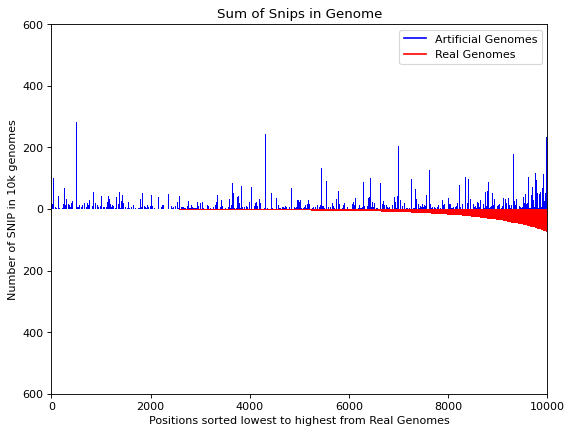

In [17]:
draw_curve_as_boxes(AG_curve_sorted, RG_curve_sorted, size=600, xaxis_label="Positions sorted lowest to highest from real genomes")

In [19]:
RG_curve_sorted = np.empty(len(RG_curve))
AG_curve_sorted = np.empty(len(AG_curve))
permutation = np.argsort(AG_curve)

for i in range(len(permutation)):
    RG_curve_sorted[i] = RG_curve[permutation[i]]
    AG_curve_sorted[i] = AG_curve[permutation[i]]

/tmp/ipykernel_3770/1310573740.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(abs(tick)) for tick in ticks])


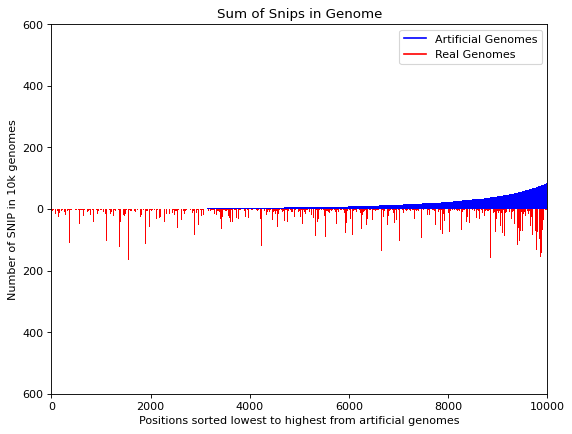

In [20]:
draw_curve_as_boxes(AG_curve_sorted, RG_curve_sorted, size=600,xaxis_label="Positions sorted lowest to highest from artificial genomes")

In [42]:
def draw_curve_as_boxes_intervall(curve1, curve2, min, max, box_size=20, size=500, xaxis_label="Genome Position"):
    fig = plt.figure(figsize=(8, 6), dpi=80)
    ax = fig.add_subplot(111)
    
    plt.xlim([min, max * box_size])
    plt.ylim([-size, size])
    patches = []
    colors = []
    
    for i in range(min, max):
        patches.append(matplotlib.patches.Rectangle((i * box_size, 0), box_size, curve1[i],))
        colors.append('blue')
        patches.append(matplotlib.patches.Rectangle((i * box_size, 0 - curve2[i]), box_size, curve2[i], color='red'))
        colors.append('red')
    
    cmap = ListedColormap(colors)
    patches_collection = PatchCollection(patches, cmap=cmap)

    patches_collection.set_array(np.arange(len(patches)))

    # Legend
    red_line = matplotlib.lines.Line2D([], [], color='red', markersize=100, label='Red line')
    blue_line = matplotlib.lines.Line2D([], [], color='blue', markersize=100, label='Blue line')
    handles = [blue_line, red_line]
    ax.legend(handles=handles, labels=["Artificial Genomes", "Real Genomes"])

    # X and Y ticks
    ticks =  ax.get_yticks()
    ax.set_yticklabels([int(abs(tick)) for tick in ticks])
    ticks =  ax.get_xticks()
    ax.set_xticklabels([tick/box_size for tick in ticks])

    # X and Y labels
    plt.ylabel("Number of SNIP in 10k genomes")
    plt.xlabel(xaxis_label)
    plt.title("Sum of Snips in Genome")
    
    ax.add_collection(patches_collection)
    plt.show()

/tmp/ipykernel_3770/2162046164.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(abs(tick)) for tick in ticks])
/tmp/ipykernel_3770/2162046164.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([tick/box_size for tick in ticks])


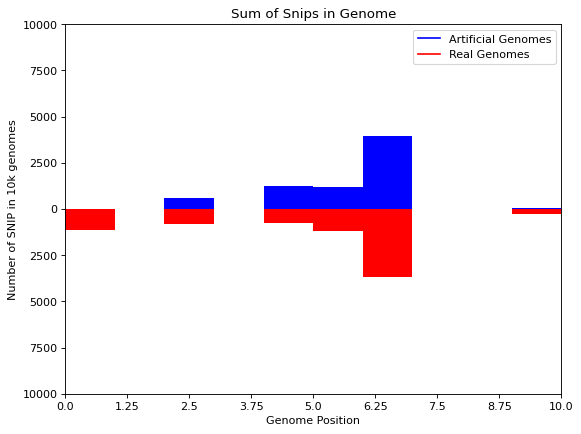

6


In [44]:
draw_curve_as_boxes_intervall(AG_curve, RG_curve, 0, 10, size=10000)
print(AG_curve[6010])